# First Stage Landing Prediction

#  Import Libraries and Define Auxiliary Functions

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standardize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

# Load the DataFrame

In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

print(data.shape)
data.head()

(90, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
print(X.shape)

X.head()

(90, 83)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
Y = data['Class'].to_numpy()   # Results Of Landing stored in Y
print(Y.shape)
Y      

(90,)


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Data Preprocessing

In [7]:
# Standardize features by removing the mean and scaling to unit variance
transform = preprocessing.StandardScaler()

In [8]:
X = transform.fit_transform(X)

# Train Test Split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (67, 83) (67,)
Test set: (23, 83) (23,)


In [10]:
Y_test.shape    # 25% of Original DataSet is used for testing predicted values 
Y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1])

# Logistic Regression

In [11]:
parameters = { 'C':[0.01,0.1,1],  'penalty':['l2'], 'solver':['lbfgs'] }

# Training the Logistic Regression Model

In [12]:
# If Hyperparameters Not Required , we can use this :
# lr=LogisticRegression()
# lr.fit(X_train,Y_train)

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}  # l1 lasso l2 ridge
lr=LogisticRegression()
lr_clf = GridSearchCV(lr,parameters,cv=10)   # cv means Cross-Validation 
lr_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [13]:
GridSearchCV_Result=pd.DataFrame(lr_clf.cv_results_)
GridSearchCV_Result[["param_C","param_penalty","mean_test_score"]]

,param_C,param_penalty,mean_test_score
0,0.01,l2,0.804762
1,0.10,l2,0.821429
2,1.00,l2,0.823810


In [14]:
print("tuned hpyerparameters :(best parameters) ",lr_clf.best_params_)
print("accuracy :",lr_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8238095238095238


# Testing the Logistic Regression Model

In [15]:
Logistic_Regression_Accuracy=lr_clf.score(X_test, Y_test)
print("test set accuracy :",Logistic_Regression_Accuracy)

test set accuracy : 0.8260869565217391


# Confusion Matrix

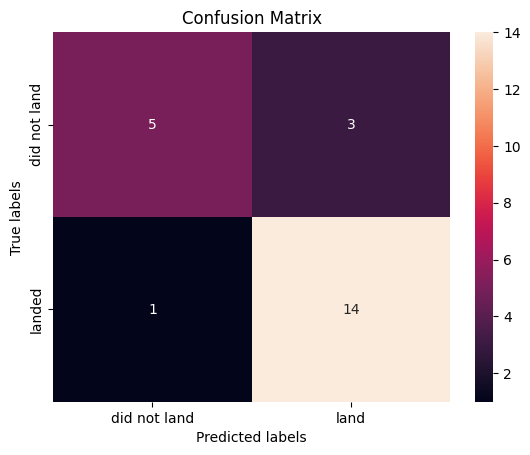

In [16]:
yhat=lr_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Support Vector Machine

In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
              
svm = SVC()   # Creating instance Of SVM model

# Training the SVM Model

In [18]:
svm_clf = GridSearchCV(svm,parameters,cv=10)
svm_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [19]:
GridSearchCV_Result=pd.DataFrame(svm_clf.cv_results_)
GridSearchCV_Result.head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001646,0.001403,0.000801,0.000400,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.571429,0.571429,...,0.714286,0.714286,0.714286,0.714286,0.666667,0.666667,0.666667,0.671429,0.054085,38
1,0.002307,0.000856,0.001104,0.000305,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.571429,0.571429,...,0.714286,0.714286,0.714286,0.714286,0.666667,0.666667,0.666667,0.671429,0.054085,38
2,0.001854,0.001122,0.001397,0.001278,0.001,0.001,poly,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}",0.571429,0.571429,...,0.714286,0.714286,0.714286,0.714286,0.666667,0.666667,0.666667,0.671429,0.054085,38


In [20]:
print(GridSearchCV_Result[["param_kernel","param_C","param_gamma","mean_test_score"]] )

    param_kernel   param_C  param_gamma  mean_test_score
0         linear     0.001        0.001         0.671429
1            rbf     0.001        0.001         0.671429
2           poly     0.001        0.001         0.671429
3            rbf     0.001        0.001         0.671429
4        sigmoid     0.001        0.001         0.671429
..           ...       ...          ...              ...
120       linear  1000.000     1000.000         0.750000
121          rbf  1000.000     1000.000         0.671429
122         poly  1000.000     1000.000         0.657143
123          rbf  1000.000     1000.000         0.671429
124      sigmoid  1000.000     1000.000         0.728571

[125 rows x 4 columns]


In [21]:
print("tuned hyperparameters :(best parameters) ",svm_clf.best_params_)
print("accuracy :",svm_clf.best_score_)

tuned hyperparameters :(best parameters)  {'C': np.float64(0.03162277660168379), 'gamma': np.float64(0.001), 'kernel': 'linear'}
accuracy : 0.838095238095238


# Testing the SVM Model

In [22]:
SVM_Accuracy=svm_clf.score(X_test, Y_test)
print("test set accuracy :",SVM_Accuracy)

test set accuracy : 0.8260869565217391


# Confusion Matrix

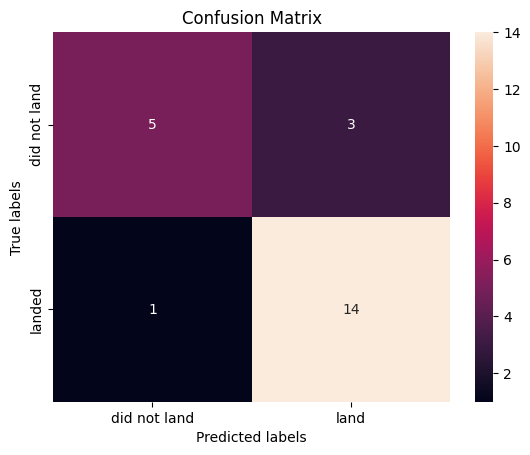

In [23]:
yhat=svm_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Decision Tree

In [24]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

# Training the Decision Tree Model

In [26]:
dt_clf = GridSearchCV(tree,parameters,cv=10)
dt_clf.fit(X_train, Y_train)

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
GridSearchCV_Result=pd.DataFrame(dt_clf.cv_results_)
GridSearchCV_Result.columns
GridSearchCV_Result[['param_criterion', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split', 'param_splitter','mean_test_score']]

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,mean_test_score
0,gini,2,auto,1,2,best,NaN
1,gini,2,auto,1,2,random,NaN
2,gini,2,auto,1,5,best,NaN
3,gini,2,auto,1,5,random,NaN
4,gini,2,auto,1,10,best,NaN
...,...,...,...,...,...,...,...
643,entropy,18,sqrt,4,2,random,0.773810
644,entropy,18,sqrt,4,5,best,0.778571
645,entropy,18,sqrt,4,5,random,0.802381
646,entropy,18,sqrt,4,10,best,0.773810


In [28]:
print("tuned hpyerparameters :(best parameters) ",dt_clf.best_params_)
print("accuracy :",dt_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8833333333333332


# Testing the Decision Tree Model

In [29]:
DecisionTree_Accuracy=dt_clf.score(X_test, Y_test)
print("test set accuracy :",DecisionTree_Accuracy)

test set accuracy : 0.8260869565217391


# Confusion matrix

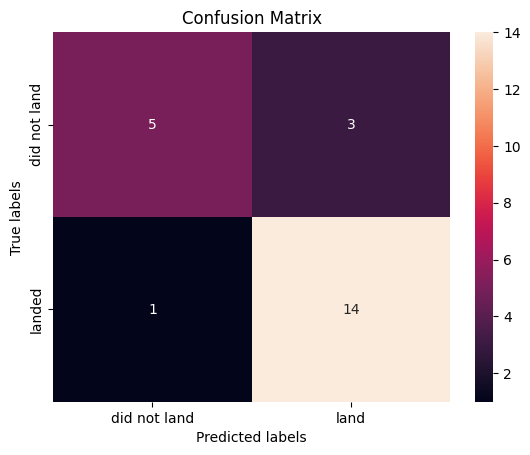

In [30]:
yhat = dt_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# k - Nearest Neighbor

In [31]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

# Training the KNN Model

In [32]:
knn_clf = GridSearchCV(KNN,parameters,cv=10)
knn_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [33]:
print("tuned hpyerparameters :(best parameters) ",knn_clf.best_params_)
print("accuracy :",knn_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.85


# Testing the KNN Model

In [34]:
KNN_Accuracy=knn_clf.score(X_test, Y_test);
print("test set accuracy :",KNN_Accuracy)

test set accuracy : 0.8695652173913043


# Confusion matrix

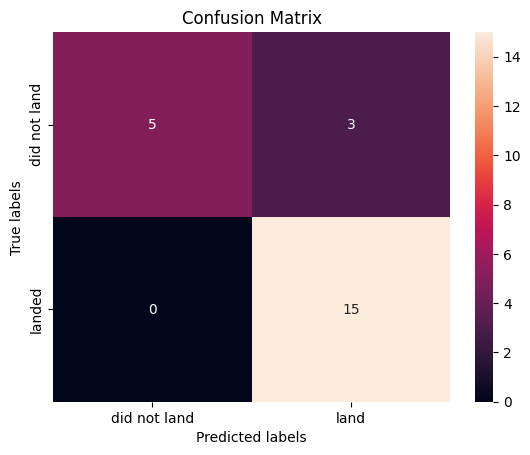

In [35]:
yhat = knn_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Performance Analysis

In [36]:
print('Accuracy for Logistics Regression method:', Logistic_Regression_Accuracy)
print( 'Accuracy for Support Vector Machine method:', SVM_Accuracy)
print('Accuracy for Decision tree method:', DecisionTree_Accuracy)
print('Accuracy for K nearsdt neighbors method:', KNN_Accuracy)

Accuracy for Logistics Regression method: 0.8260869565217391
Accuracy for Support Vector Machine method: 0.8260869565217391
Accuracy for Decision tree method: 0.8260869565217391
Accuracy for K nearsdt neighbors method: 0.8695652173913043


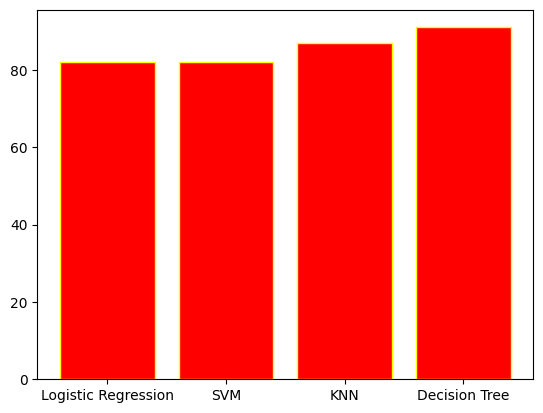

In [37]:
import matplotlib.pyplot as plt
X=["Logistic Regression","SVM","KNN","Decision Tree"]
Y=[82,82,87,91]
plt.bar(X,Y,color="red",edgecolor="Yellow")
plt.show()
